<h1 align="center">Uniiversidad Autonoma de Chihuahua</h1>
<h2 align="center">Facultad de Ingenieria </h2>
<h2 align="center">Maestria en Ingenieria en Computacion</h2>
<h3 align="center">Proyecto Final Machine Learning</h3>
<h3 align="center">Asesor: Mtra. Olanda Prieto Ordaz </h3>
<h4 align="center">Adalberto Emmanuel Rojas</h4>
<h4 align="center">173374 </h4>


<h4 align="center">Prediccion de Resultados en el Futbol </h4>

<img align="center" src= "..\ML_Final\imagenes\futbol.jpg"></img>

### De acuerdo a la base de datos con la cuál esta trabajando para generar su investigación, realice la implementación de al menos dos modelo tradicionales de machine learning (por ejemplo SVM, Random Forest, ensamble)  y  una red neuronal artificial.

#### La implementación deberá incluir lo siguiente:

#### 1.  Implementación de base de datos para realizar las particiones de entrenamiento, validación y prueba.

In [38]:
import pandas as pd 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
scaler = MaxAbsScaler()
from sklearn.metrics import precision_recall_fscore_support as score, confusion_matrix, roc_auc_score, classification_report, log_loss

from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn import preprocessing, model_selection, metrics
from sklearn.model_selection import GridSearchCV
%matplotlib inline

import scikitplot as skplt
import warnings
warnings.filterwarnings('ignore')

In [39]:
# Leer archivo e imprimir los primeros 5 registros
matches = pd.read_csv("matches.csv", index_col=0)
matches.head()

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,match report,notes,sh,sot,dist,fk,pk,pkatt,season,team
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,Match Report,NaN,21.0,5.0,17.0,1.0,0,0,2023,Barcelona
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,Match Report,NaN,15.0,7.0,14.6,0.0,0,0,2023,Barcelona
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,Match Report,NaN,24.0,9.0,14.4,1.0,0,0,2023,Barcelona
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,Match Report,NaN,18.0,5.0,16.0,2.0,0,0,2023,Barcelona
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,Match Report,NaN,16.0,8.0,14.9,0.0,0,0,2023,Barcelona


In [40]:
# Hacer shape y ver cuantos partidos tiene cada equipo
matches.shape
matches["team"].value_counts()

Barcelona          35
Atletico Madrid    35
Espanyol           35
Valladolid         35
Getafe             35
Cadiz              35
Celta Vigo         35
Almeria            35
Valencia           35
Mallorca           35
Rayo Vallecano     35
Osasuna            35
Sevilla            35
Girona             35
Athletic Club      35
Real Betis         35
Villarreal         35
Real Sociedad      35
Real Madrid        35
Elche              35
Name: team, dtype: int64

In [41]:
matches["round"].value_counts()

Matchweek 1     20
Matchweek 27    20
Matchweek 21    20
Matchweek 22    20
Matchweek 23    20
Matchweek 24    20
Matchweek 25    20
Matchweek 26    20
Matchweek 28    20
Matchweek 17    20
Matchweek 29    20
Matchweek 30    20
Matchweek 31    20
Matchweek 32    20
Matchweek 33    20
Matchweek 34    20
Matchweek 20    20
Matchweek 19    20
Matchweek 2     20
Matchweek 9     20
Matchweek 3     20
Matchweek 4     20
Matchweek 5     20
Matchweek 6     20
Matchweek 7     20
Matchweek 8     20
Matchweek 10    20
Matchweek 18    20
Matchweek 11    20
Matchweek 12    20
Matchweek 13    20
Matchweek 14    20
Matchweek 15    20
Matchweek 16    20
Matchweek 35    20
Name: round, dtype: int64

In [42]:
# Limpieza de datos
# ver tipos de datos
matches.dtypes

date             object
time             object
comp             object
round            object
day              object
venue            object
result           object
gf              float64
ga              float64
opponent         object
xg              float64
xga             float64
poss            float64
attendance      float64
captain          object
formation        object
referee          object
match report     object
notes           float64
sh              float64
sot             float64
dist            float64
fk              float64
pk                int64
pkatt             int64
season            int64
team             object
dtype: object

In [43]:
#convertir date a tiempo
matches["date"]=pd.to_datetime(matches["date"])
matches.dtypes

date            datetime64[ns]
time                    object
comp                    object
round                   object
day                     object
venue                   object
result                  object
gf                     float64
ga                     float64
opponent                object
xg                     float64
xga                    float64
poss                   float64
attendance             float64
captain                 object
formation               object
referee                 object
match report            object
notes                  float64
sh                     float64
sot                    float64
dist                   float64
fk                     float64
pk                       int64
pkatt                    int64
season                   int64
team                    object
dtype: object

In [44]:
#Crear los datos predictores para aplicar ML
#Convertir venue a numeros visita 0 y casa 1
matches["venue_code"]=matches["venue"].astype("category").cat.codes
#Oponente a numerico , asignar a cada equipo un numero
matches["opp_code"]=matches["opponent"].astype("category").cat.codes
#mantener solo las horas y eliminar minutos, reemplazar minutos con nada
matches["hour"]=matches["time"].str.replace(":.+", "",regex=True).astype("int")
#Dias a numeros
matches["day_code"]=matches["date"].dt.dayofweek
#Definir target numerico, si gana es 1, si pierde o empata 0
matches["target"]=(matches["result"]=="W").astype("int")
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,fk,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,1.0,0,0,2023,Barcelona,1,13,21,5,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0.0,0,0,2023,Barcelona,0,15,22,6,1
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,1.0,0,0,2023,Barcelona,1,18,19,6,1
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,2.0,0,0,2023,Barcelona,0,16,21,5,1
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0.0,0,0,2023,Barcelona,0,6,18,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2023-04-26,22:00,La Liga,Matchweek 31,Wed,Away,L,0.0,1.0,Celta Vigo,...,1.0,0,0,2023,Elche,0,5,22,2,0
34,2023-04-29,16:15,La Liga,Matchweek 32,Sat,Home,W,4.0,0.0,Rayo Vallecano,...,1.0,0,0,2023,Elche,1,13,16,5,1
35,2023-05-02,19:30,La Liga,Matchweek 33,Tue,Away,L,1.0,2.0,Almería,...,0.0,0,0,2023,Elche,0,0,19,1,0
36,2023-05-14,16:15,La Liga,Matchweek 34,Sun,Home,W,1.0,0.0,Atlético Madrid,...,0.0,0,0,2023,Elche,1,2,16,6,1


In [45]:
# crear columna con goles de diferencia para cada partido, restando los goles en contra de los goles a favor
matches["goal_diff"]=(matches["gf"]-matches["ga"]).astype("int")
matches

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,goal_diff
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,0,0,2023,Barcelona,1,13,21,5,0,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0,0,2023,Barcelona,0,15,22,6,1,3
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,0,0,2023,Barcelona,1,18,19,6,1,4
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,0,0,2023,Barcelona,0,16,21,5,1,3
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0,0,2023,Barcelona,0,6,18,5,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,2023-04-26,22:00,La Liga,Matchweek 31,Wed,Away,L,0.0,1.0,Celta Vigo,...,0,0,2023,Elche,0,5,22,2,0,-1
34,2023-04-29,16:15,La Liga,Matchweek 32,Sat,Home,W,4.0,0.0,Rayo Vallecano,...,0,0,2023,Elche,1,13,16,5,1,4
35,2023-05-02,19:30,La Liga,Matchweek 33,Tue,Away,L,1.0,2.0,Almería,...,0,0,2023,Elche,0,0,19,1,0,-1
36,2023-05-14,16:15,La Liga,Matchweek 34,Sun,Home,W,1.0,0.0,Atlético Madrid,...,0,0,2023,Elche,1,2,16,6,1,1


In [46]:
# Agrupar los datos por equipo
grouped_matches=matches.groupby("team")
group=grouped_matches.get_group("Barcelona")
group

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,pk,pkatt,season,team,venue_code,opp_code,hour,day_code,target,goal_diff
0,2022-08-13,21:00,La Liga,Matchweek 1,Sat,Home,D,0.0,0.0,Rayo Vallecano,...,0,0,2023,Barcelona,1,13,21,5,0,0
1,2022-08-21,22:00,La Liga,Matchweek 2,Sun,Away,W,4.0,1.0,Real Sociedad,...,0,0,2023,Barcelona,0,15,22,6,1,3
2,2022-08-28,19:30,La Liga,Matchweek 3,Sun,Home,W,4.0,0.0,Valladolid,...,0,0,2023,Barcelona,1,18,19,6,1,4
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,0,0,2023,Barcelona,0,16,21,5,1,3
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,0,0,2023,Barcelona,0,6,18,5,1,4
7,2022-09-17,16:15,La Liga,Matchweek 6,Sat,Home,W,3.0,0.0,Elche,...,0,0,2023,Barcelona,1,7,16,5,1,3
8,2022-10-01,21:00,La Liga,Matchweek 7,Sat,Away,W,1.0,0.0,Mallorca,...,0,0,2023,Barcelona,0,11,21,5,1,1
10,2022-10-09,21:00,La Liga,Matchweek 8,Sun,Home,W,1.0,0.0,Celta Vigo,...,0,0,2023,Barcelona,1,5,21,6,1,1
12,2022-10-16,16:15,La Liga,Matchweek 9,Sun,Away,L,1.0,3.0,Real Madrid,...,0,0,2023,Barcelona,0,14,16,6,0,-2
13,2022-10-20,21:00,La Liga,Matchweek 10,Thu,Home,W,3.0,0.0,Villarreal,...,0,0,2023,Barcelona,1,19,21,3,1,3


In [47]:
# Crear funcion rolling averages la cual va a tomar el rolling de los ultimos 3 partidos
def rolling_averages(group, cols, new_cols):
    group = group.sort_values("date")
    rolling_stats = group[cols].rolling(3, closed='left').mean()
    group[new_cols]=rolling_stats
    group=group.dropna(subset=new_cols)
    return group

In [48]:
# Crear nuevas columnas con el rolling average para goles a favor gf, goles en contra ga, tiros sh, tiros a gol sot, distancia recorrida de cada tiro dist, tiros libres fk, tiros penales pk, e intento de tiro penal pkatt
cols = ["gf", "ga", "sh", "sot", "dist", "fk", "pk", "pkatt"]
new_cols=[f"{c}_rolling" for c in cols]
new_cols

['gf_rolling',
 'ga_rolling',
 'sh_rolling',
 'sot_rolling',
 'dist_rolling',
 'fk_rolling',
 'pk_rolling',
 'pkatt_rolling']

In [49]:
rolling_averages(group, cols, new_cols)

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,goal_diff,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2022-09-03,21:00,La Liga,Matchweek 4,Sat,Away,W,3.0,0.0,Sevilla,...,1,3,2.666667,0.333333,20.000000,7.000000,15.333333,0.666667,0.0,0.000000
5,2022-09-10,18:30,La Liga,Matchweek 5,Sat,Away,W,4.0,0.0,Cádiz,...,1,4,3.666667,0.333333,19.000000,7.000000,15.000000,1.000000,0.0,0.000000
7,2022-09-17,16:15,La Liga,Matchweek 6,Sat,Home,W,3.0,0.0,Elche,...,1,3,3.666667,0.000000,19.333333,7.333333,15.100000,1.000000,0.0,0.000000
8,2022-10-01,21:00,La Liga,Matchweek 7,Sat,Away,W,1.0,0.0,Mallorca,...,1,1,3.333333,0.000000,19.666667,7.333333,15.300000,0.666667,0.0,0.000000
10,2022-10-09,21:00,La Liga,Matchweek 8,Sun,Home,W,1.0,0.0,Celta Vigo,...,1,1,2.666667,0.000000,17.333333,6.666667,16.200000,0.000000,0.0,0.000000
12,2022-10-16,16:15,La Liga,Matchweek 9,Sun,Away,L,1.0,3.0,Real Madrid,...,0,-2,1.666667,0.000000,16.333333,5.666667,15.933333,0.000000,0.0,0.000000
13,2022-10-20,21:00,La Liga,Matchweek 10,Thu,Home,W,3.0,0.0,Villarreal,...,1,3,1.000000,1.000000,14.000000,4.333333,16.133333,0.333333,0.0,0.000000
14,2022-10-23,21:00,La Liga,Matchweek 11,Sun,Home,W,4.0,0.0,Athletic Club,...,1,4,1.666667,1.000000,15.666667,5.000000,14.633333,0.666667,0.0,0.000000
16,2022-10-29,21:00,La Liga,Matchweek 12,Sat,Away,W,1.0,0.0,Valencia,...,1,1,2.666667,1.000000,14.666667,5.666667,14.366667,0.666667,0.0,0.000000
18,2022-11-05,21:00,La Liga,Matchweek 13,Sat,Home,W,2.0,0.0,Almería,...,1,2,2.666667,0.000000,13.000000,4.666667,13.966667,0.333333,0.0,0.000000


In [50]:
# Agregar rolling average y agrupar 
matches_rolling = matches.groupby("team").apply(lambda x: rolling_averages(x, cols, new_cols))
matches_rolling

date   time     comp         round  day venue result   gf  \
team                                                                            
Almeria    3  2022-09-05  21:00  La Liga   Matchweek 4  Mon  Away      L  0.0   
           4  2022-09-12  21:00  La Liga   Matchweek 5  Mon  Home      L  0.0   
           5  2022-09-17  14:00  La Liga   Matchweek 6  Sat  Away      L  0.0   
           6  2022-09-30  21:00  La Liga   Matchweek 7  Fri  Away      L  0.0   
           7  2022-10-08  14:00  La Liga   Matchweek 8  Sat  Home      W  3.0   
...                  ...    ...      ...           ...  ...   ...    ...  ...   
Villarreal 44 2023-04-27  19:30  La Liga  Matchweek 31  Thu  Home      W  4.0   
           45 2023-04-30  16:15  La Liga  Matchweek 32  Sun  Home      W  3.0   
           46 2023-05-03  19:30  La Liga  Matchweek 33  Wed  Away      D  1.0   
           47 2023-05-13  18:30  La Liga  Matchweek 34  Sat  Home      W  5.0   
           48 2023-05-20  14:00  La Liga  Matchweek 35  Sat  Away      W  2.0   

                ga        opponent  ...  target  goal_diff  gf_rolling  \
team                                ...                                  
Almeria    3   1.0      Valladolid  ...       0         -1    1.333333   
           4   1.0         Osasuna  ...       0         -1    1.000000   
           5   1.0        Mallorca  ...       0         -1    0.666667   
           6   4.0   Athletic Club  ...       0         -4    0.000000   
           7   1.0  Rayo Vallecano  ...       1          2    0.000000   
...            ...             ...  ...     ...        ...         ...   
Villarreal 44  2.0        Espanyol  ...       1          2    1.666667   
           45  1.0      Celta Vigo  ...       1          2    2.000000   
           46  1.0        Valencia  ...       0          0    2.666667   
           47  1.0   Athletic Club  ...       1          4    2.666667   
           48  1.0          Girona  ...       1          1    3.000000   

               ga_rolling sh_rolling sot_rolling dist_rolling fk_rolling  \
team                                                                       
Almeria    3     1.333333  11.000000    6.000000    17.766667   0.666667   
           4     1.000000  11.666667    4.000000    16.966667   0.666667   
           5     1.000000  10.000000    2.333333    17.200000   0.333333   
           6     1.000000   9.333333    1.333333    19.633333   0.000000   
           7     2.000000   8.000000    2.000000    18.733333   0.000000   
...                   ...        ...         ...          ...        ...   
Villarreal 44    2.000000  18.666667    6.666667    17.433333   0.666667   
           45    2.000000  23.000000    8.000000    16.466667   0.666667   
           46    1.666667  18.333333    6.666667    16.633333   0.333333   
           47    1.333333  16.333333    6.333333    17.433333   1.000000   
           48    1.000000  12.000000    6.000000    17.400000   1.000000   

               pk_rolling  pkatt_rolling  
team                                      
Almeria    3          0.0       0.000000  
           4          0.0       0.000000  
           5          0.0       0.000000  
           6          0.0       0.000000  
           7          0.0       0.000000  
...                   ...            ...  
Villarreal 44         0.0       0.000000  
           45         0.0       0.333333  
           46         0.0       0.666667  
           47         0.0       0.666667  
           48         0.0       0.333333  

[640 rows x 41 columns]

In [51]:
#quitar el nivel extra con nombres de equipos
matches_rolling = matches_rolling.droplevel("team")
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,goal_diff,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
3,2022-09-05,21:00,La Liga,Matchweek 4,Mon,Away,L,0.0,1.0,Valladolid,...,0,-1,1.333333,1.333333,11.000000,6.000000,17.766667,0.666667,0.0,0.000000
4,2022-09-12,21:00,La Liga,Matchweek 5,Mon,Home,L,0.0,1.0,Osasuna,...,0,-1,1.000000,1.000000,11.666667,4.000000,16.966667,0.666667,0.0,0.000000
5,2022-09-17,14:00,La Liga,Matchweek 6,Sat,Away,L,0.0,1.0,Mallorca,...,0,-1,0.666667,1.000000,10.000000,2.333333,17.200000,0.333333,0.0,0.000000
6,2022-09-30,21:00,La Liga,Matchweek 7,Fri,Away,L,0.0,4.0,Athletic Club,...,0,-4,0.000000,1.000000,9.333333,1.333333,19.633333,0.000000,0.0,0.000000
7,2022-10-08,14:00,La Liga,Matchweek 8,Sat,Home,W,3.0,1.0,Rayo Vallecano,...,1,2,0.000000,2.000000,8.000000,2.000000,18.733333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44,2023-04-27,19:30,La Liga,Matchweek 31,Thu,Home,W,4.0,2.0,Espanyol,...,1,2,1.666667,2.000000,18.666667,6.666667,17.433333,0.666667,0.0,0.000000
45,2023-04-30,16:15,La Liga,Matchweek 32,Sun,Home,W,3.0,1.0,Celta Vigo,...,1,2,2.000000,2.000000,23.000000,8.000000,16.466667,0.666667,0.0,0.333333
46,2023-05-03,19:30,La Liga,Matchweek 33,Wed,Away,D,1.0,1.0,Valencia,...,0,0,2.666667,1.666667,18.333333,6.666667,16.633333,0.333333,0.0,0.666667
47,2023-05-13,18:30,La Liga,Matchweek 34,Sat,Home,W,5.0,1.0,Athletic Club,...,1,4,2.666667,1.333333,16.333333,6.333333,17.433333,1.000000,0.0,0.666667


In [52]:
#asignar valores desde 0 al index
matches_rolling.index=range(matches_rolling.shape[0])
matches_rolling

,date,time,comp,round,day,venue,result,gf,ga,opponent,...,target,goal_diff,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,2022-09-05,21:00,La Liga,Matchweek 4,Mon,Away,L,0.0,1.0,Valladolid,...,0,-1,1.333333,1.333333,11.000000,6.000000,17.766667,0.666667,0.0,0.000000
1,2022-09-12,21:00,La Liga,Matchweek 5,Mon,Home,L,0.0,1.0,Osasuna,...,0,-1,1.000000,1.000000,11.666667,4.000000,16.966667,0.666667,0.0,0.000000
2,2022-09-17,14:00,La Liga,Matchweek 6,Sat,Away,L,0.0,1.0,Mallorca,...,0,-1,0.666667,1.000000,10.000000,2.333333,17.200000,0.333333,0.0,0.000000
3,2022-09-30,21:00,La Liga,Matchweek 7,Fri,Away,L,0.0,4.0,Athletic Club,...,0,-4,0.000000,1.000000,9.333333,1.333333,19.633333,0.000000,0.0,0.000000
4,2022-10-08,14:00,La Liga,Matchweek 8,Sat,Home,W,3.0,1.0,Rayo Vallecano,...,1,2,0.000000,2.000000,8.000000,2.000000,18.733333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,2023-04-27,19:30,La Liga,Matchweek 31,Thu,Home,W,4.0,2.0,Espanyol,...,1,2,1.666667,2.000000,18.666667,6.666667,17.433333,0.666667,0.0,0.000000
636,2023-04-30,16:15,La Liga,Matchweek 32,Sun,Home,W,3.0,1.0,Celta Vigo,...,1,2,2.000000,2.000000,23.000000,8.000000,16.466667,0.666667,0.0,0.333333
637,2023-05-03,19:30,La Liga,Matchweek 33,Wed,Away,D,1.0,1.0,Valencia,...,0,0,2.666667,1.666667,18.333333,6.666667,16.633333,0.333333,0.0,0.666667
638,2023-05-13,18:30,La Liga,Matchweek 34,Sat,Home,W,5.0,1.0,Athletic Club,...,1,4,2.666667,1.333333,16.333333,6.333333,17.433333,1.000000,0.0,0.666667


In [53]:
#quitar valores no numericos y de fechas
matches_rolling_num=matches_rolling.select_dtypes(include=[np.number])
matches_rolling_num

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,...,target,goal_diff,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,0.0,1.0,0.5,1.2,49.0,20260.0,NaN,12.0,0.0,17.6,...,0,-1,1.333333,1.333333,11.000000,6.000000,17.766667,0.666667,0.0,0.000000
1,0.0,1.0,0.2,2.0,61.0,12397.0,NaN,7.0,2.0,19.0,...,0,-1,1.000000,1.000000,11.666667,4.000000,16.966667,0.666667,0.0,0.000000
2,0.0,1.0,0.4,0.6,56.0,12687.0,NaN,9.0,2.0,22.3,...,0,-1,0.666667,1.000000,10.000000,2.333333,17.200000,0.333333,0.0,0.000000
3,0.0,4.0,0.7,2.1,42.0,42110.0,NaN,8.0,2.0,14.9,...,0,-4,0.000000,1.000000,9.333333,1.333333,19.633333,0.000000,0.0,0.000000
4,3.0,1.0,1.2,0.8,37.0,10783.0,NaN,10.0,4.0,18.9,...,1,2,0.000000,2.000000,8.000000,2.000000,18.733333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,2.0,3.7,0.9,64.0,16134.0,NaN,30.0,12.0,16.4,...,1,2,1.666667,2.000000,18.666667,6.666667,17.433333,0.666667,0.0,0.000000
636,3.0,1.0,2.4,0.9,51.0,16123.0,NaN,8.0,3.0,17.5,...,1,2,2.000000,2.000000,23.000000,8.000000,16.466667,0.666667,0.0,0.333333
637,1.0,1.0,0.7,1.2,67.0,43634.0,NaN,11.0,4.0,18.4,...,0,0,2.666667,1.666667,18.333333,6.666667,16.633333,0.333333,0.0,0.666667
638,5.0,1.0,3.2,3.1,56.0,16871.0,NaN,17.0,11.0,16.3,...,1,4,2.666667,1.333333,16.333333,6.333333,17.433333,1.000000,0.0,0.666667


In [54]:
#exportar a csv y leer de vuelta
matches_rolling_num.to_csv("matches_rolling_nums.csv")
matches_rolling_num_file= pd.read_csv("matches_rolling_nums.csv", index_col=0)

In [55]:
#crear dataframe con los datos
df=pd.DataFrame(matches_rolling_num_file)
df 

,gf,ga,xg,xga,poss,attendance,notes,sh,sot,dist,...,target,goal_diff,gf_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,0.0,1.0,0.5,1.2,49.0,20260.0,NaN,12.0,0.0,17.6,...,0,-1,1.333333,1.333333,11.000000,6.000000,17.766667,0.666667,0.0,0.000000
1,0.0,1.0,0.2,2.0,61.0,12397.0,NaN,7.0,2.0,19.0,...,0,-1,1.000000,1.000000,11.666667,4.000000,16.966667,0.666667,0.0,0.000000
2,0.0,1.0,0.4,0.6,56.0,12687.0,NaN,9.0,2.0,22.3,...,0,-1,0.666667,1.000000,10.000000,2.333333,17.200000,0.333333,0.0,0.000000
3,0.0,4.0,0.7,2.1,42.0,42110.0,NaN,8.0,2.0,14.9,...,0,-4,0.000000,1.000000,9.333333,1.333333,19.633333,0.000000,0.0,0.000000
4,3.0,1.0,1.2,0.8,37.0,10783.0,NaN,10.0,4.0,18.9,...,1,2,0.000000,2.000000,8.000000,2.000000,18.733333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
635,4.0,2.0,3.7,0.9,64.0,16134.0,NaN,30.0,12.0,16.4,...,1,2,1.666667,2.000000,18.666667,6.666667,17.433333,0.666667,0.0,0.000000
636,3.0,1.0,2.4,0.9,51.0,16123.0,NaN,8.0,3.0,17.5,...,1,2,2.000000,2.000000,23.000000,8.000000,16.466667,0.666667,0.0,0.333333
637,1.0,1.0,0.7,1.2,67.0,43634.0,NaN,11.0,4.0,18.4,...,0,0,2.666667,1.666667,18.333333,6.666667,16.633333,0.333333,0.0,0.666667
638,5.0,1.0,3.2,3.1,56.0,16871.0,NaN,17.0,11.0,16.3,...,1,4,2.666667,1.333333,16.333333,6.333333,17.433333,1.000000,0.0,0.666667


In [56]:
# Crear el target para la data el cual va a ser los resultados de los partidos 0 para derrotas y empate 1 para victorias
target = df['target']
target


0      0
1      0
2      0
3      0
4      1
      ..
635    1
636    1
637    0
638    1
639    1
Name: target, Length: 640, dtype: int64

In [57]:
# Crear arreglo con los features mas importantes
features = df[['gf_rolling','sh_rolling','ga_rolling','sh_rolling','sot_rolling','dist_rolling','fk_rolling','pk_rolling',	'pkatt_rolling']]
features

,gf_rolling,sh_rolling,ga_rolling,sh_rolling,sot_rolling,dist_rolling,fk_rolling,pk_rolling,pkatt_rolling
0,1.333333,11.000000,1.333333,11.000000,6.000000,17.766667,0.666667,0.0,0.000000
1,1.000000,11.666667,1.000000,11.666667,4.000000,16.966667,0.666667,0.0,0.000000
2,0.666667,10.000000,1.000000,10.000000,2.333333,17.200000,0.333333,0.0,0.000000
3,0.000000,9.333333,1.000000,9.333333,1.333333,19.633333,0.000000,0.0,0.000000
4,0.000000,8.000000,2.000000,8.000000,2.000000,18.733333,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...
635,1.666667,18.666667,2.000000,18.666667,6.666667,17.433333,0.666667,0.0,0.000000
636,2.000000,23.000000,2.000000,23.000000,8.000000,16.466667,0.666667,0.0,0.333333
637,2.666667,18.333333,1.666667,18.333333,6.666667,16.633333,0.333333,0.0,0.666667
638,2.666667,16.333333,1.333333,16.333333,6.333333,17.433333,1.000000,0.0,0.666667


In [58]:
#aunque se puede meter los features directamente en las funciones de prediccion se cambia el nombre por costumbre en la clase a X y
X=features
y=target

#### Particion de entrenamiento y prueba


In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
len(X_train)

512

In [60]:
len(X_test)

128

#### 2. Transformación de los datos

In [61]:
feature_tr = Pipeline([('maxabsscaler', MaxAbsScaler()),])
X_train_transformed = feature_tr.fit_transform(X_train)
X_test_transformed = feature_tr.fit_transform(X_test)

#### Se crea arreglo con los nombres y tipos de modelos a probar SIN el escalamiento para ver si mejoran o no las predicciones

In [62]:
names = ["Nearest Neighbors", "Logistic Regression","Linear SVM", "RBF SVM","Decision Tree", "Random Forest", "Neural Net"]

classifiers = [
    KNeighborsClassifier(3),
    LogisticRegression(),
    SVC(kernel="linear", C=0.025, probability=True),
    SVC(gamma=2, C=1, probability=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000)
    ]

Nearest Neighbors 0.5078125

              precision    recall  f1-score   support

           0       0.59      0.65      0.62        79
           1       0.33      0.29      0.31        49

    accuracy                           0.51       128
   macro avg       0.46      0.47      0.46       128
weighted avg       0.49      0.51      0.50       128

Logistic Regression 0.6015625

              precision    recall  f1-score   support

           0       0.61      0.96      0.75        79
           1       0.25      0.02      0.04        49

    accuracy                           0.60       128
   macro avg       0.43      0.49      0.39       128
weighted avg       0.47      0.60      0.48       128

Linear SVM 0.6171875

              precision    recall  f1-score   support

           0       0.62      1.00      0.76        79
           1       0.00      0.00      0.00        49

    accuracy                           0.62       128
   macro avg       0.31      0.50      0.38   

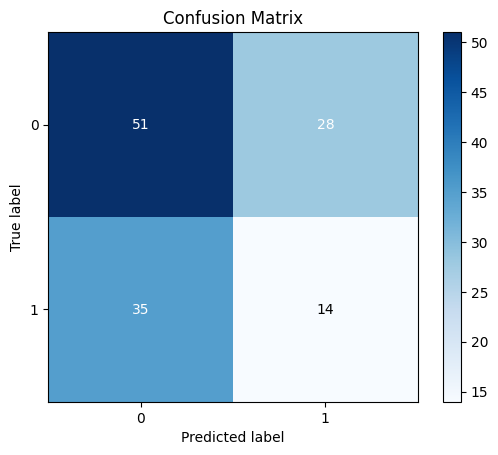

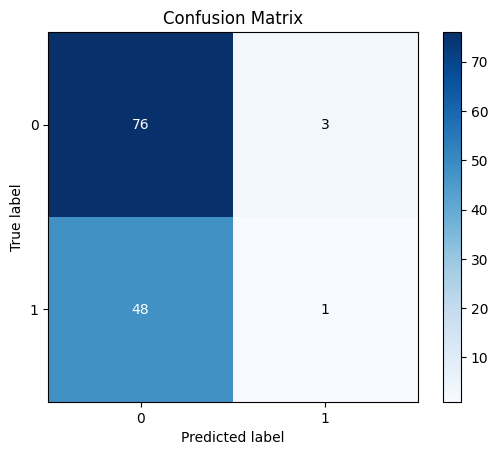

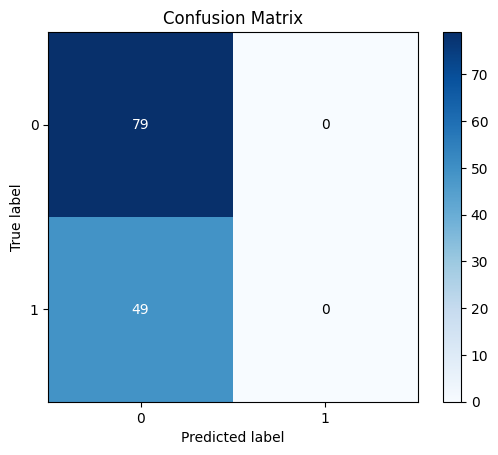

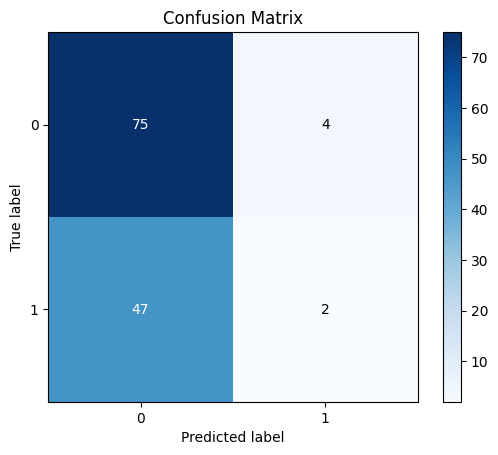

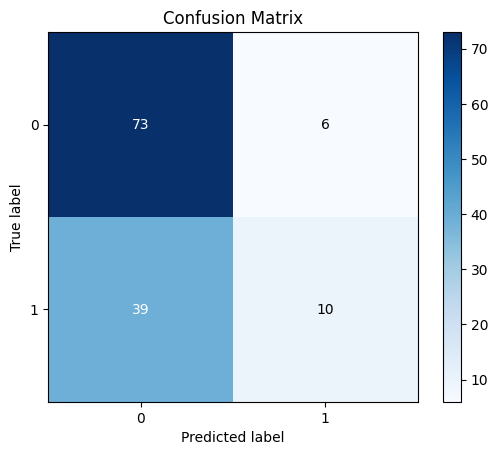

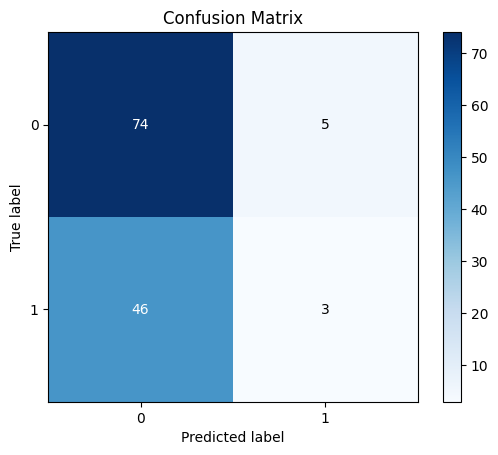

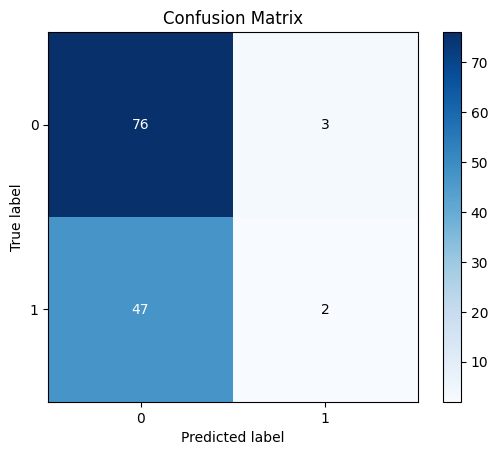

In [63]:
# Crear ciclo para probar cada uno de los modelos en el arreglo anterior y se prueban los modelos sin escalamiento
for name, clf in zip(names, classifiers):
        clf.fit(X_train, y_train)
        accuracy = clf.score(X_test, y_test)
        # Create predictions
        y_pred = clf.predict(X_test)
        y_pred_prob = clf.predict_proba(X_test)
        print(name, accuracy)
        print('')
        print(metrics.classification_report(y_test, y_pred))
        skplt.metrics.plot_confusion_matrix(y_test,y_pred)


Se puede observar que sin el escalamiento el mejor modelo fue el de desicion tree con un 64% de aciertos muy cerca de lo que se pretende hacer que es el 65%

#### 4. Buscar los mejores hiper-parámetros para el modelo (GridSearch o RandomizedSearch)

In [64]:
param_grid={'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
grid_SVC=GridSearchCV(SVC(), param_grid, refit=True, verbose=3)
grid_SVC.fit(X_train_transformed, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.612 total time=   0.0s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.608 total time=   0.0s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.618 total time=   0.0s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.612 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [65]:
#Ver los mejores parametros obtenidos
print(grid_SVC.best_params_)
print(grid_SVC.best_estimator_)

{'C': 1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=1, gamma=1)


In [66]:
SVC_tunned=grid_SVC.best_estimator_

In [71]:
X_test_transformed = feature_tr.fit_transform(X_test)
grid_SVC_predictions = grid_SVC.predict(X_test_transformed)
#accuracy = clf.score(X_test, y_test)
#accuracy = grid_SVC_predictions.score(X_test_transformed, y_test)
#print(accuracy)  
# print classification report
print(classification_report(y_test, grid_SVC_predictions))

              precision    recall  f1-score   support

           0       0.63      0.97      0.76        79
           1       0.60      0.06      0.11        49

    accuracy                           0.62       128
   macro avg       0.61      0.52      0.44       128
weighted avg       0.62      0.62      0.51       128



<Axes: title={'center': 'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

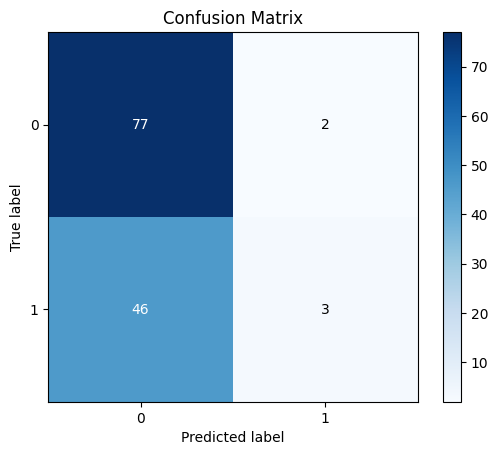

In [69]:
skplt.metrics.plot_confusion_matrix(y_test,grid_SVC_predictions)

Podemos observar que SVM con los datos transformados se quedo exactamente igual 